In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



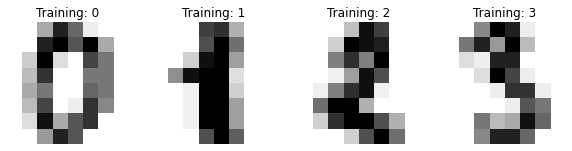

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



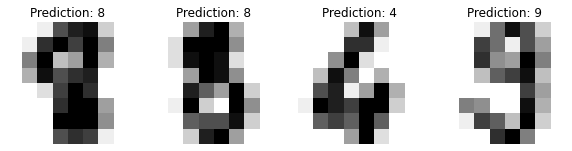

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


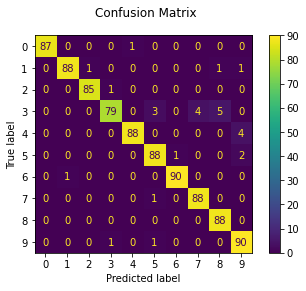

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

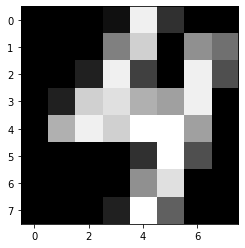

In [ ]:
plt.imshow(X_test[100].reshape(8,8), cmap='gray')

In [ ]:
X_test[100].reshape(8,8)

array([[ 0.,  0.,  0.,  1., 15.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 13.,  0.,  9.,  7.],
       [ 0.,  0.,  2., 15.,  4.,  0., 15.,  5.],
       [ 0.,  2., 13., 14., 11., 10., 15.,  0.],
       [ 0., 11., 15., 13., 16., 16., 10.,  0.],
       [ 0.,  0.,  0.,  0.,  3., 16.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  9., 14.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  6.,  0.,  0.]])

# Đọc ảnh từ drive

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import os
import imutils
import numpy as np

Link dataset: https://drive.google.com/drive/folders/1gRZc2ejXsYcNdzmt4I2SMwLBa4_JblYg?usp=sharing

In [ ]:
%cd /content/drive/MyDrive/Handwriting

/content/drive/.shortcut-targets-by-id/1gRZc2ejXsYcNdzmt4I2SMwLBa4_JblYg/Handwriting


In [ ]:
def read_file_img():
    my_X_test = []
    my_y_test = []
    for folder in os.listdir():
        for imgPath in os.listdir(folder):
            img = cv.imread(os.path.join(folder, imgPath), 0)
            my_X_test.append(img)
            my_y_test.append(folder)
    return my_X_test, my_y_test

In [ ]:
my_X_test, my_y_test = read_file_img()

In [ ]:
len(my_X_test)

28

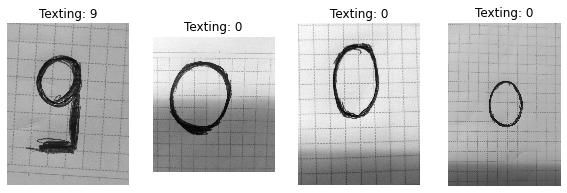

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, my_X_test[-4:], my_y_test[-4:]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Texting: {}".format(label))

# Cắt ảnh một cách chính xác nhất từ bộ data

In [ ]:
def drawHist(img):
    gray_hist = cv.calcHist([img], [0], None, [256], [0, 256])
    plt.figure()
    plt.title('Grayscale Histogram')
    plt.xlabel('Bins')
    plt.ylabel('# of pixels')
    plt.plot(gray_hist)
    plt.xlim([0, 256])
    plt.show()

In [ ]:
def resize(image, w=0, h=0, choice='w'):
    if choice == 'w':
        width = w
        height = int(w * image.shape[0] / image.shape[1])
        image = cv.resize(image, (width, height), interpolation=cv.INTER_AREA)
    else:
        height = h
        width = int(h * image.shape[1] / image.shape[0])
        image = cv.resize(image, (width, height), interpolation=cv.INTER_AREA)

    return image

In [ ]:
def preprocessing(image):
    rectKern = cv.getStructuringElement(cv.MORPH_RECT, (13, 5))
    topHat = cv.morphologyEx(image, cv.MORPH_TOPHAT, rectKern)
    blackHat = cv.morphologyEx(image, cv.MORPH_BLACKHAT, rectKern)
    img = cv.add(image, topHat)
    img = cv.subtract(img, blackHat)
    img = cv.GaussianBlur(img, (3, 3), 0)
    # drawHist(img)
    img = cv.threshold(img, 60, 255, cv.THRESH_BINARY)[1]
    # img = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
    #         cv.THRESH_BINARY,11,2)
    img = cv.erode(img, (3, 3), iterations=2)
    img = cv.dilate(img, (3, 3), iterations=2)
    img = cv.GaussianBlur(img, (3, 3), 0)

    return img

In [ ]:
def find_cnt(image):
    cnts = cv.findContours(image, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv.contourArea, reverse=True)[:3]

    # contours = cv.drawContours(cv.cvtColor(image, cv.COLOR_GRAY2BGR), cnts, -1, (0, 255, 0))
    # plt.imshow(contours)
    list_cnts = []
    for i in cnts:
        x, y, w, h = cv.boundingRect(i)
        ratio = h / w
        # print(ratio)
        area = w * h
        if 1 <= ratio <= 4 and area >= 0.1 * image.shape[0]*image.shape[1]:
            list_cnts.append(i)

    if len(list_cnts) > 0:
        return cv.boundingRect(list_cnts[0])
    return None, None, None, None

In [ ]:
my_X_test_preprocessed = []
my_y_test_preprocessed = []
for img, label in zip(my_X_test, my_y_test):
    image = resize(img, w=150, choice='w')
    image = preprocessing(image)
    # plt.imshow(image, cmap='gray')
    im_bw = cv.Canny(image, 10, 150)
    # plt.imshow(im_bw, cmap='gray')


    x, y, w, h = find_cnt(im_bw)
    if x is not None:
        image_with_bounding_contour = image[y:y+h, x:x+w]
        my_X_test_preprocessed.append(image_with_bounding_contour)
        my_y_test_preprocessed.append(label)
        # plt.imshow(image_with_bounding_contour, cmap='gray')

In [ ]:
print(len(my_X_test_preprocessed))

26


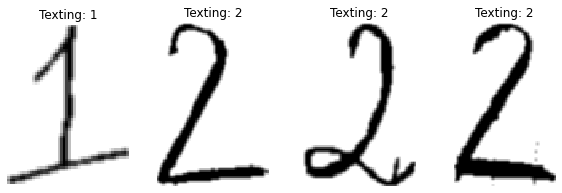

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, my_X_test_preprocessed, my_y_test_preprocessed):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Texting: {}".format(label))

* Các bước xử lí tiếp theo, nhóm sẽ tìm cách để có được ảnh giống bộ dữ liệu được train nhất có thể

# Đảo màu và rescale từ 0 - 255 xuống 0 - 15

In [ ]:
def inv_and_cvt(image):
    return (~image / 255 * 15).astype('uint8')

In [ ]:
for i in range(len(my_X_test_preprocessed)):
    my_X_test_preprocessed[i] = inv_and_cvt(my_X_test_preprocessed[i])

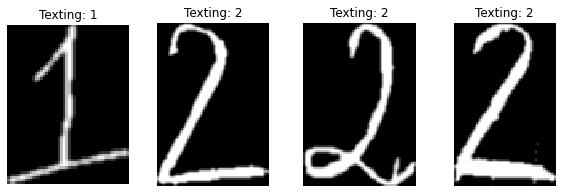

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, my_X_test_preprocessed, my_y_test_preprocessed):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Texting: {}".format(label))

# Resize thành 8*x

In [ ]:
for i in range(len(my_X_test_preprocessed)): 
    my_X_test_preprocessed[i] = resize(my_X_test_preprocessed[i], h=8, choice='h')

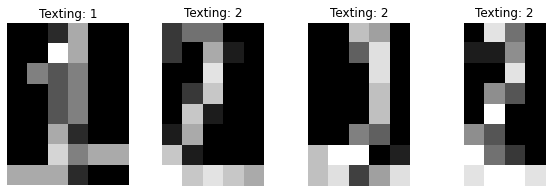

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, my_X_test_preprocessed, my_y_test_preprocessed):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Texting: {}".format(label))

# Padding để có ảnh 8*8

In [ ]:
my_X_test_final = []
for i in range(len(my_X_test_preprocessed)):
    w_base = 8 - my_X_test_preprocessed[i].shape[1]
    if w_base % 2 == 0:
        w_base_l = w_base_r = w_base // 2
    else:
        w_base_l = w_base // 2
        w_base_r = w_base_l + 1
    
    base_size_l = (8, w_base_l)
    base_size_r = (8, w_base_r)
    base_l = np.zeros(base_size_l, np.uint8)
    base_r = np.zeros(base_size_r, np.uint8)

    vis = np.concatenate((base_l, my_X_test_preprocessed[i]), axis=1)
    vis = np.concatenate((vis, base_r), axis = 1)

    my_X_test_final.append(vis)


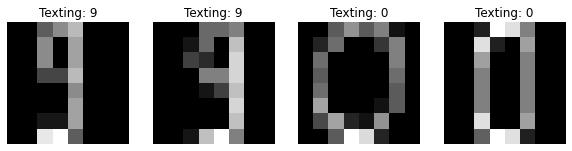

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, my_X_test_final[-4:], my_y_test_preprocessed[-4:]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray, interpolation="nearest")
    ax.set_title("Texting: {}".format(label))

In [ ]:
X_test.shape

(899, 64)

In [ ]:
y_test.shape

(899,)

In [ ]:
my_y_test_preprocessed = np.array(my_y_test_preprocessed)

In [ ]:
my_y_test_preprocessed = my_y_test_preprocessed.astype('uint8')

In [ ]:
my_y_test_preprocessed.shape

(26,)

In [ ]:
my_X_test_final = np.array(my_X_test_final)

In [ ]:
my_X_test_final = my_X_test_final.reshape(-1, 64)

In [ ]:
my_X_test_final.shape

(26, 64)

# predict

In [ ]:
predicted = clf.predict(my_X_test_final)

In [ ]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(my_y_test_preprocessed, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           2       0.67      0.67      0.67         3
           3       0.20      0.50      0.29         2
           4       1.00      1.00      1.00         2
           5       0.33      0.50      0.40         4
           6       0.00      0.00      0.00         3
           7       1.00      1.00      1.00         3
           8       0.33      0.33      0.33         3
           9       0.50      0.67      0.57         3

    accuracy                           0.50        26
   macro avg       0.40      0.47      0.43        26
weighted avg       0.43      0.50      0.46        26




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion matrix:
[[0 0 0 1 0 1 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 1 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0]
 [0 0 0 0 2 0 0 0 0 0]
 [0 0 0 2 0 2 0 0 0 0]
 [0 0 0 0 0 1 0 0 2 0]
 [0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 1 2]
 [0 0 0 1 0 0 0 0 0 2]]


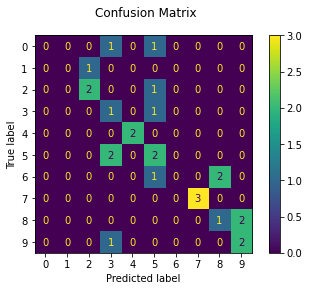

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(my_y_test_preprocessed, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

- Nhận xét: model dự đoán chính xác gần 50% data mà nhóm em chuẩn bị. 

In [ ]:
my_X_test_final = my_X_test_final.reshape(-1, 8, 8)

#Visualize một số hình ảnh kèm nhãn thực và nhãn dự đoán cho các ảnh trong tập test của nhóm

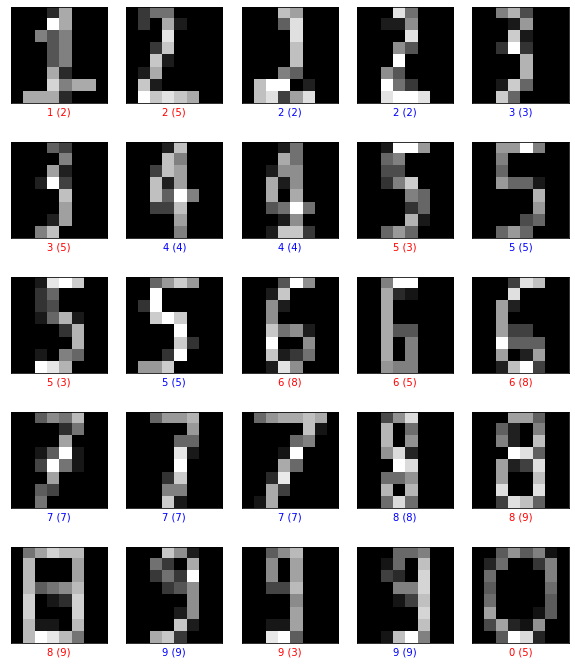

In [ ]:
plt.figure(figsize=(10,12))
for i in range(25):
    plt.subplot(5, 5, 1 + i)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(my_X_test_final[i], cmap='gray')
    if predicted[i] == my_y_test_preprocessed[i]:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(my_y_test_preprocessed[i],
                                predicted[i]),
                                color=color)